In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [10]:

df = pd.read_csv('/content/dataset_final.csv', parse_dates=['date'], index_col=['date'])
df = df.drop('Unnamed: 0', axis=1)
df.head()

,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,btc_google_search,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,OVOL,VIX
date,,,,,,,,,,,,,,
2015-01-15,211.91,1352.8,46.37,1992.67,102309.0,3,0.568670,0.021141,-0.044705,-0.009291,0.853974,0.344132,0.344950,22.39
2015-01-16,199.46,1364.9,48.49,2019.42,104699.0,3,-0.060548,0.008905,0.044705,0.013335,0.857286,0.348453,0.346061,20.95
2015-01-20,208.00,1377.4,46.79,2022.55,98485.0,3,0.041924,0.009116,-0.035688,0.001549,0.857176,0.348518,0.346647,19.89
2015-01-21,225.51,1378.4,47.85,2032.12,98485.0,3,0.080826,0.000726,0.022402,0.004720,0.893605,0.350149,0.347336,18.85
2015-01-22,226.32,1390.2,45.93,2063.15,93698.0,3,0.003585,0.008524,-0.040953,0.015154,0.904949,0.351242,0.343230,16.40


In [11]:
df.describe()

,btc_price,gold_price,oil_wti_price,sp500_close,btc_num_trans,btc_google_search,btc_dr,gold_dr,oil_dr,sp500_dr,BVOL,GVOL,OVOL,VIX
count,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000
mean,4211.423240,1340.306056,52.089947,2485.500621,244992.591976,12.485238,0.003159,0.000199,-0.000501,0.000271,0.668661,0.145395,0.350590,16.232226
std,3977.583336,115.686006,10.780374,377.578605,77850.372709,14.681053,0.049246,0.009308,0.035508,0.011765,0.296051,0.052264,0.249379,7.854295
min,199.460000,1097.700000,-36.980000,1829.080000,85232.000000,2.000000,-0.491226,-0.071322,-0.281382,-0.127652,0.137440,0.065379,0.130754,9.140000
25%,455.190000,1270.300000,46.280000,2108.290000,197876.000000,3.000000,-0.013026,-0.003995,-0.013902,-0.003026,0.434661,0.114385,0.226720,12.340000
50%,3430.240000,1324.200000,51.980000,2468.110000,244259.000000,10.000000,0.002636,0.000151,0.000418,0.000504,0.596158,0.129315,0.286832,14.150000
75%,7380.010000,1391.800000,58.910000,2792.670000,303724.000000,15.000000,0.021901,0.004371,0.012646,0.004723,0.913385,0.166992,0.368328,17.330000
max,19039.000000,1768.900000,77.410000,3386.150000,439549.000000,100.000000,0.568670,0.067930,0.425832,0.089683,1.414832,0.371978,1.803450,82.690000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1321 entries, 2015-01-15 to 2020-04-27
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   btc_price          1321 non-null   float64
 1   gold_price         1321 non-null   float64
 2   oil_wti_price      1321 non-null   float64
 3   sp500_close        1321 non-null   float64
 4   btc_num_trans      1321 non-null   float64
 5   btc_google_search  1321 non-null   int64  
 6   btc_dr             1321 non-null   float64
 7   gold_dr            1321 non-null   float64
 8   oil_dr             1321 non-null   float64
 9   sp500_dr           1321 non-null   float64
 10  BVOL               1321 non-null   float64
 11  GVOL               1321 non-null   float64
 12  OVOL               1321 non-null   float64
 13  VIX                1321 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 154.8 KB


# Plotting
**A time series plot of your data and visually check if there are any obvious trends or seasonality.**

In [13]:
viz = df.columns.tolist()
print(viz)

['btc_price', 'gold_price', 'oil_wti_price', 'sp500_close', 'btc_num_trans', 'btc_google_search', 'btc_dr', 'gold_dr', 'oil_dr', 'sp500_dr', 'BVOL', 'GVOL', 'OVOL', 'VIX']


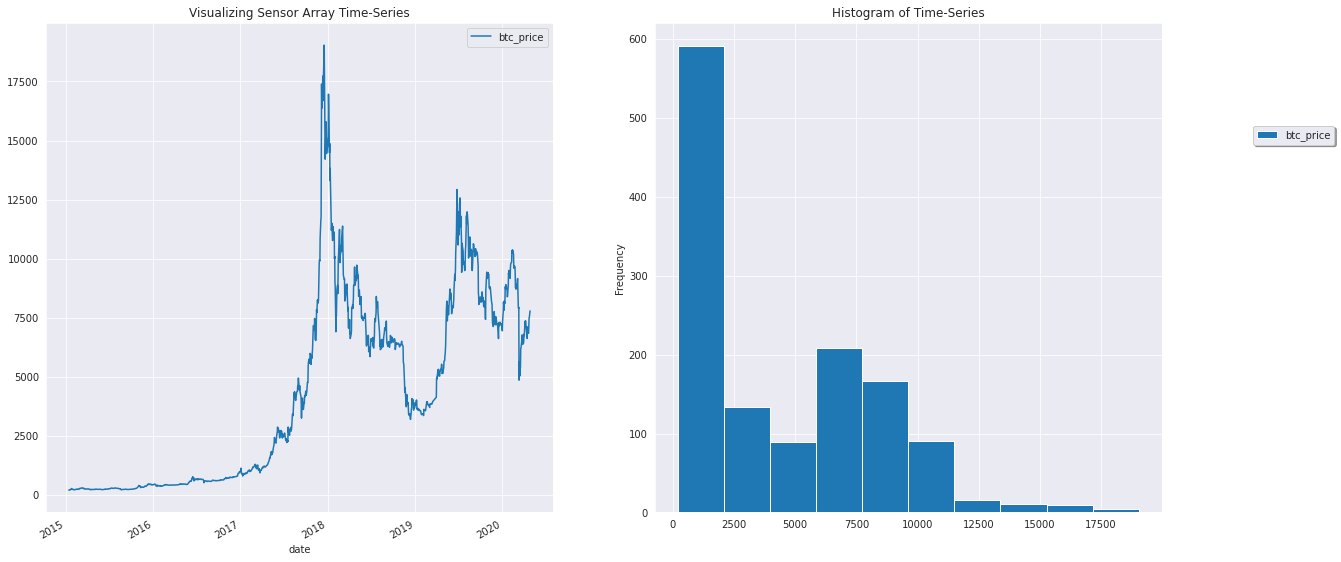

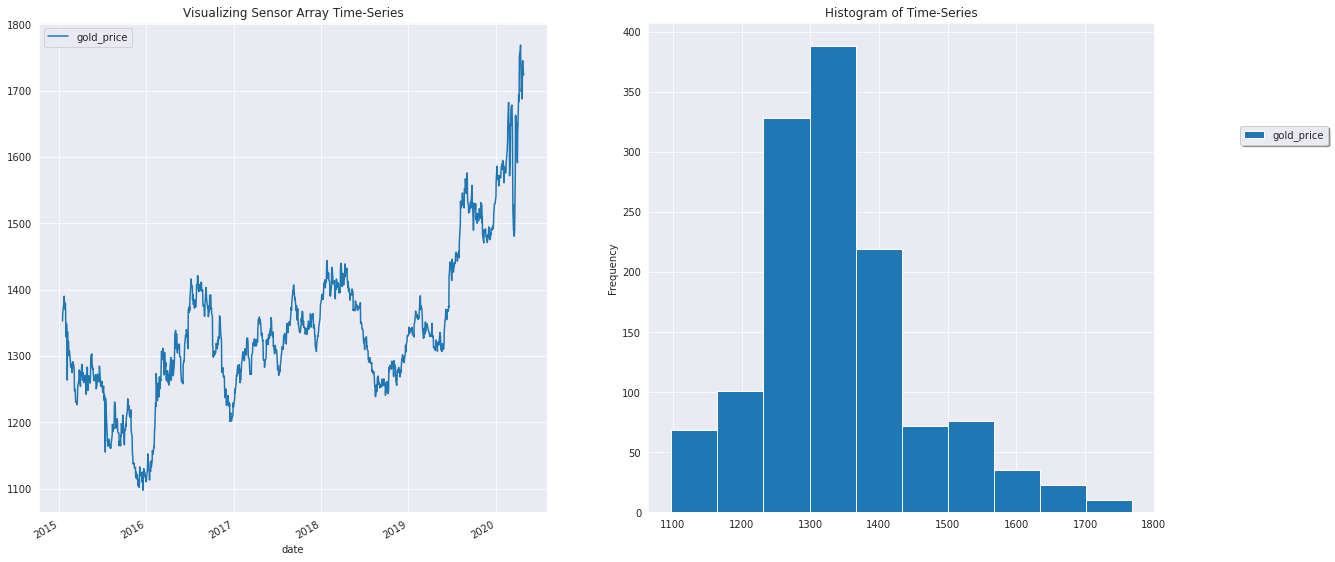

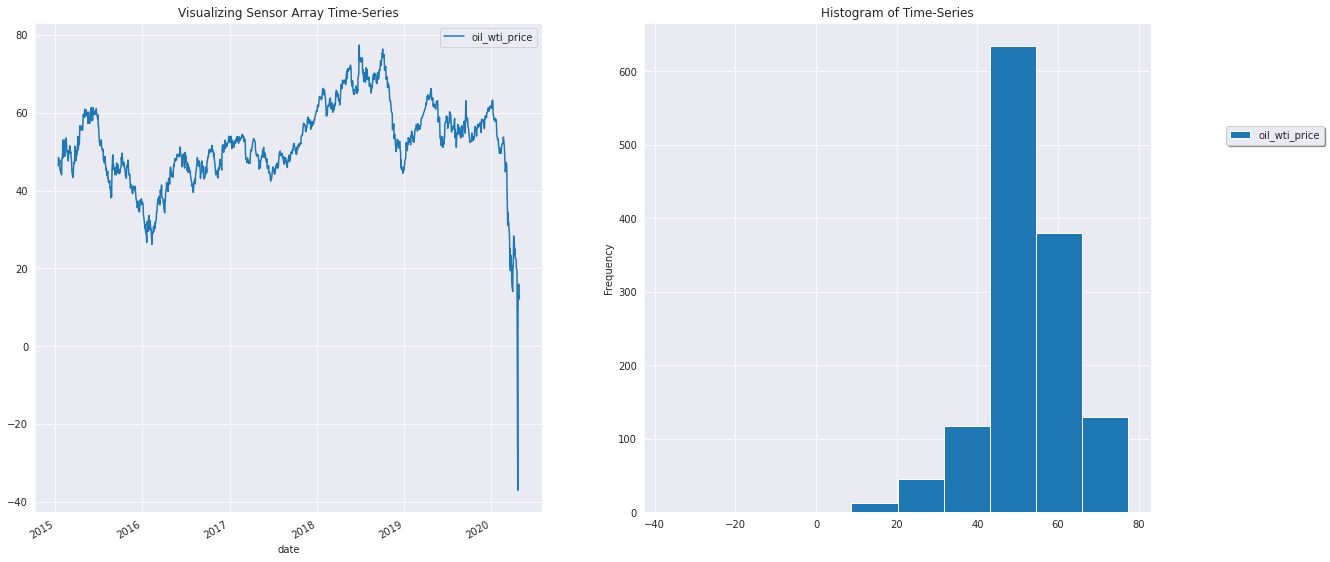

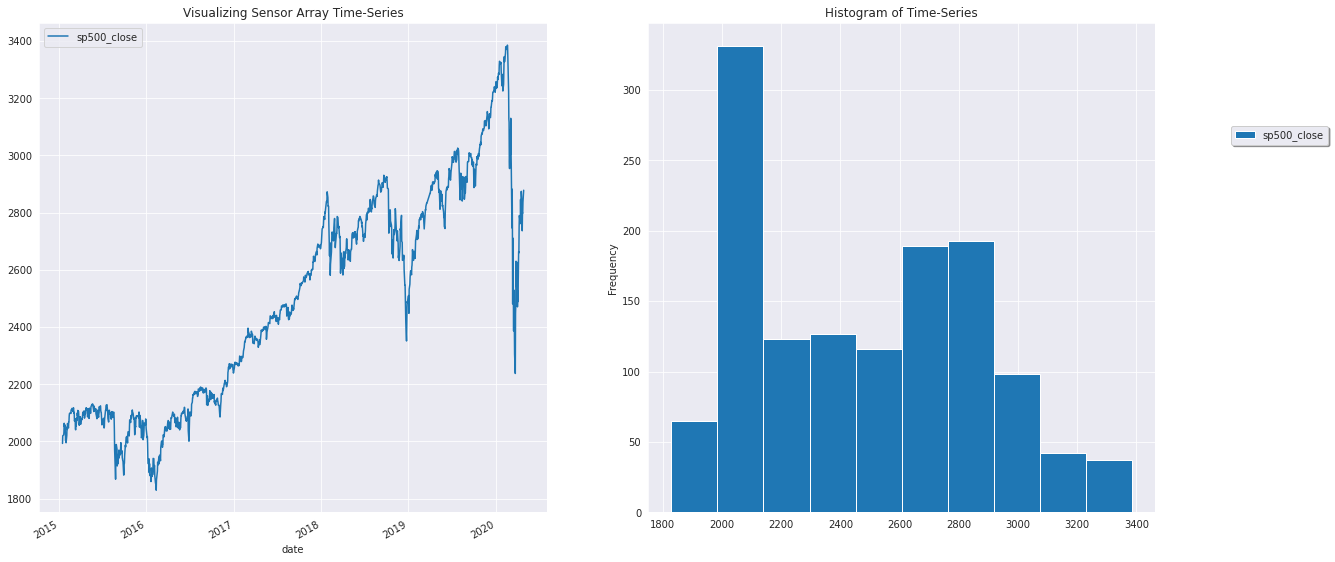

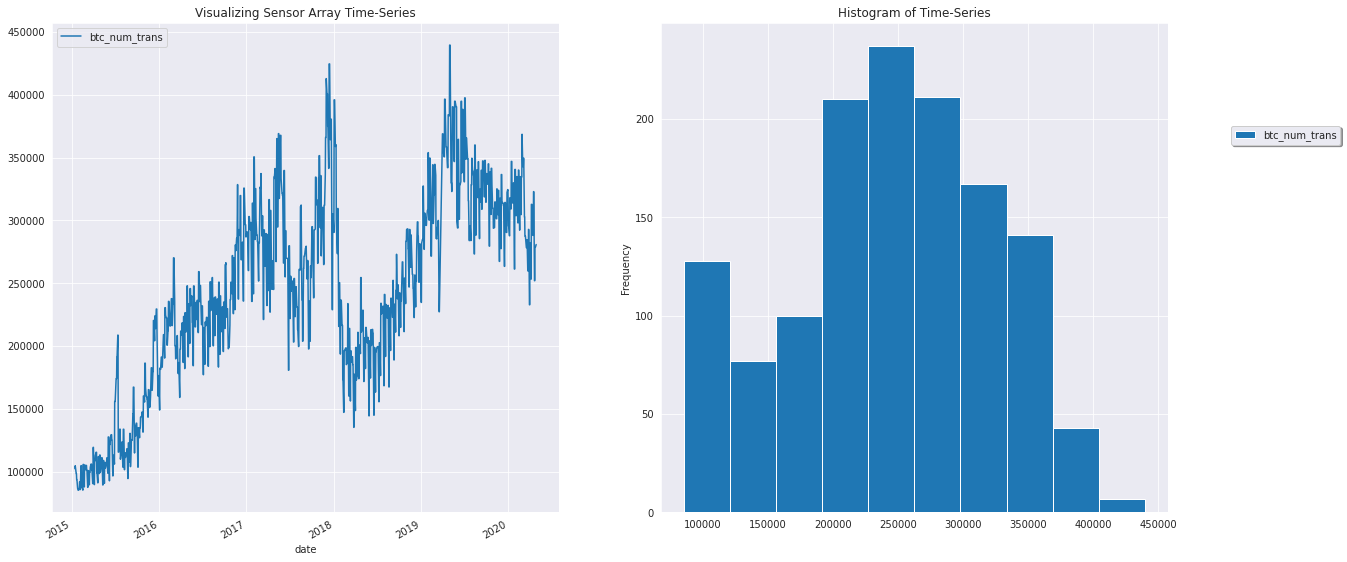

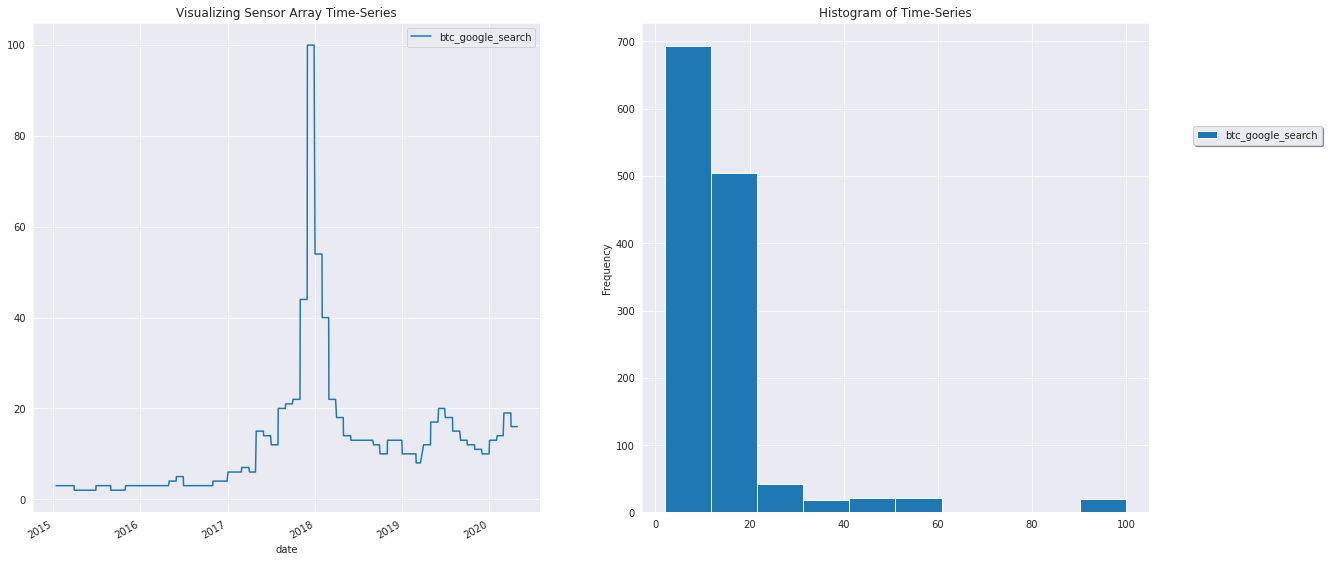

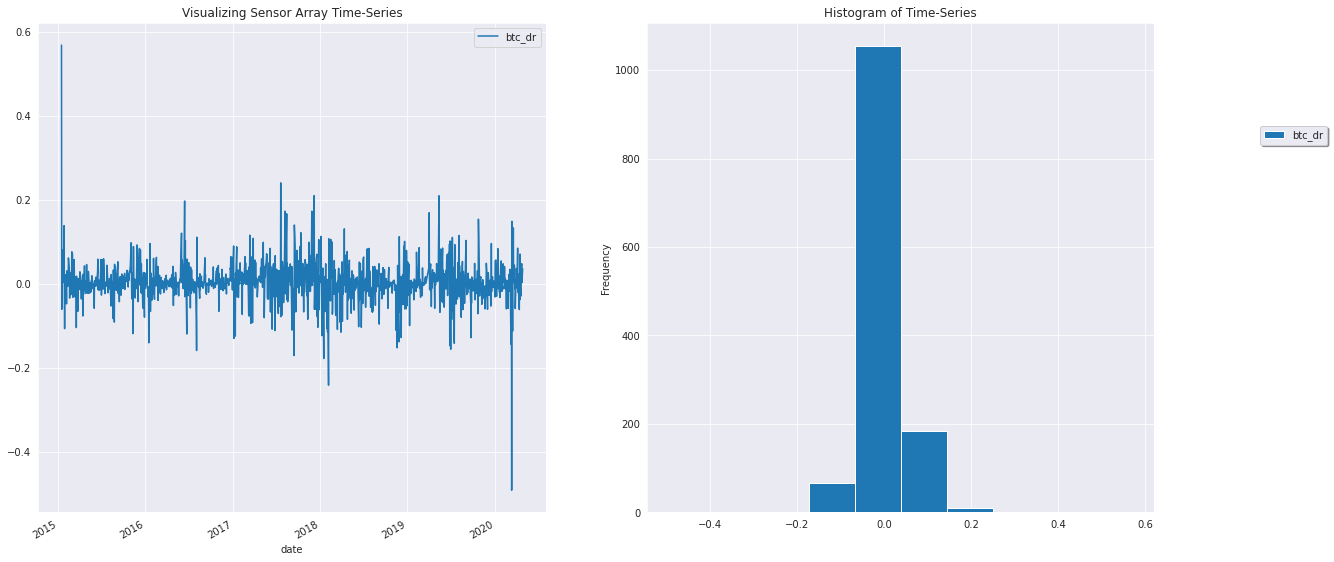

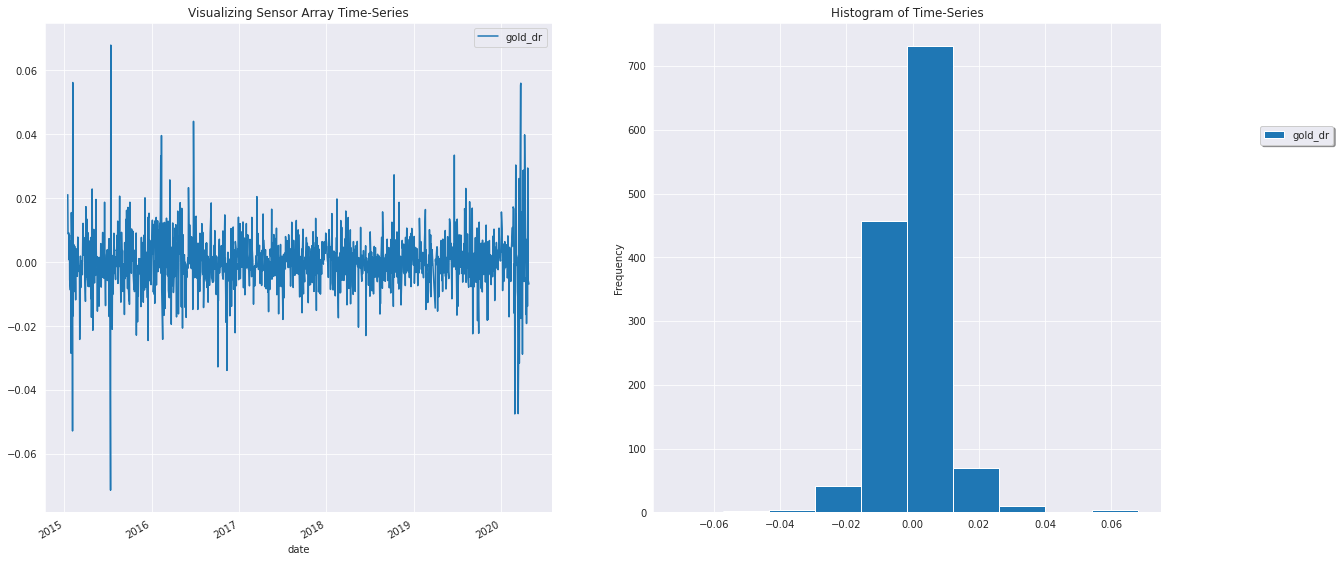

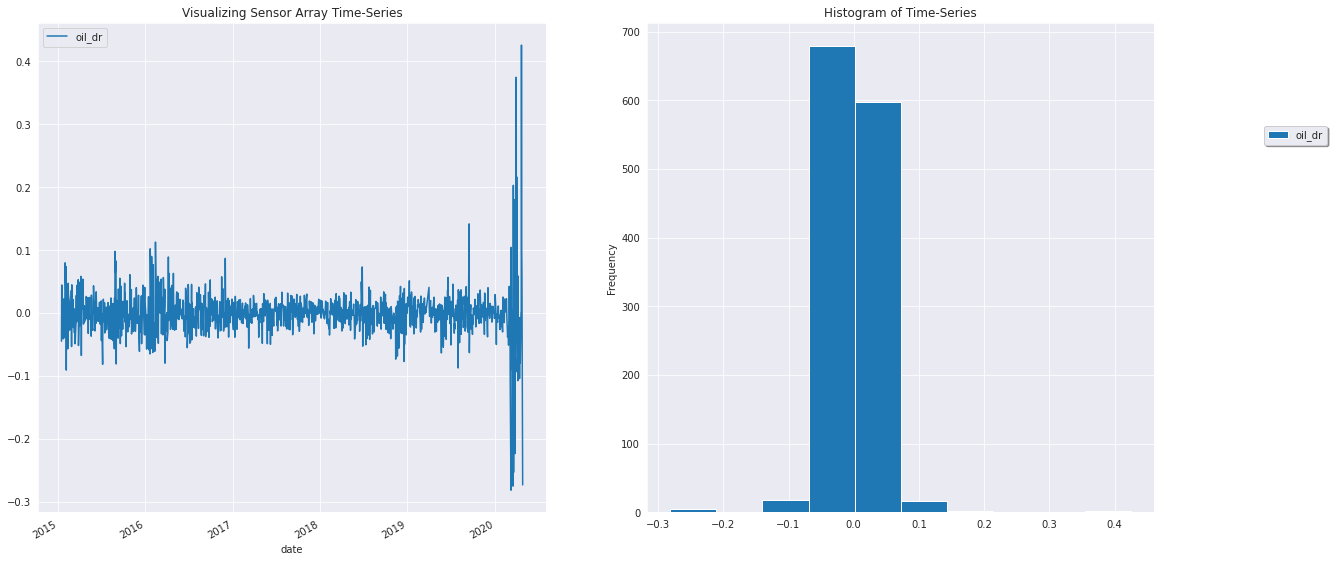

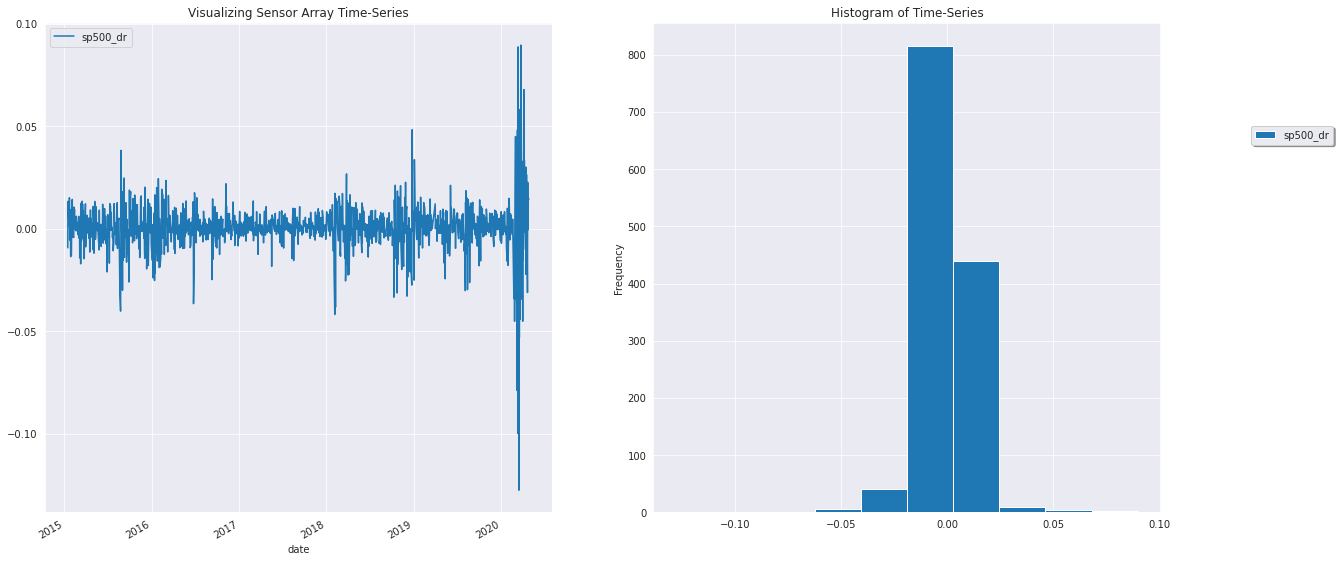

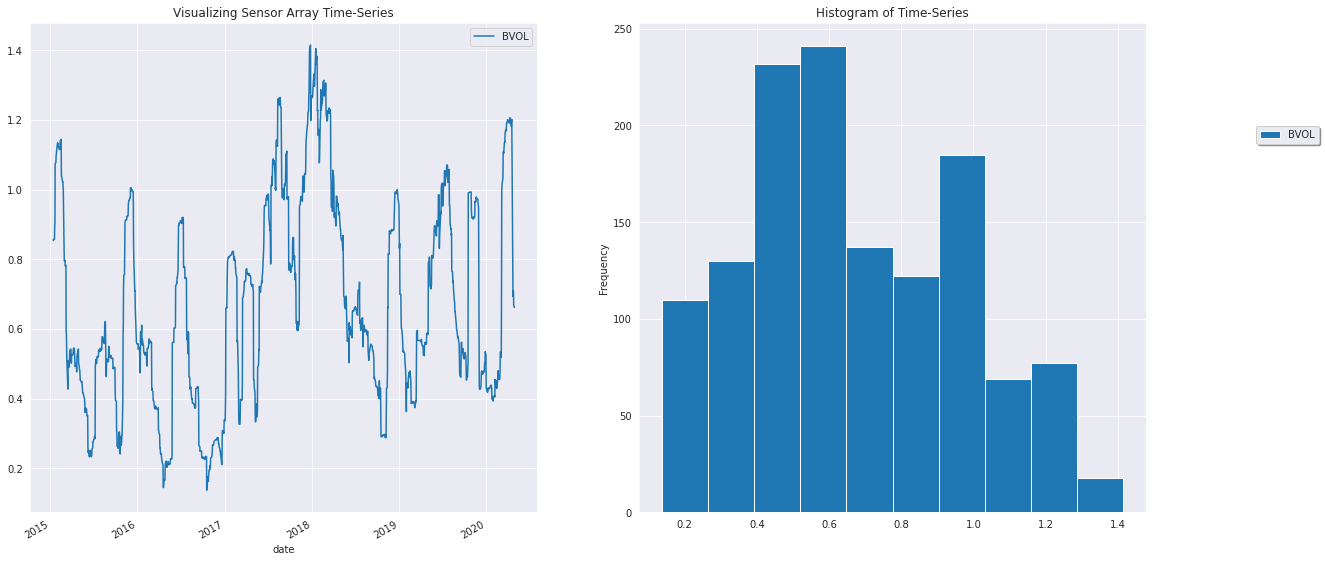

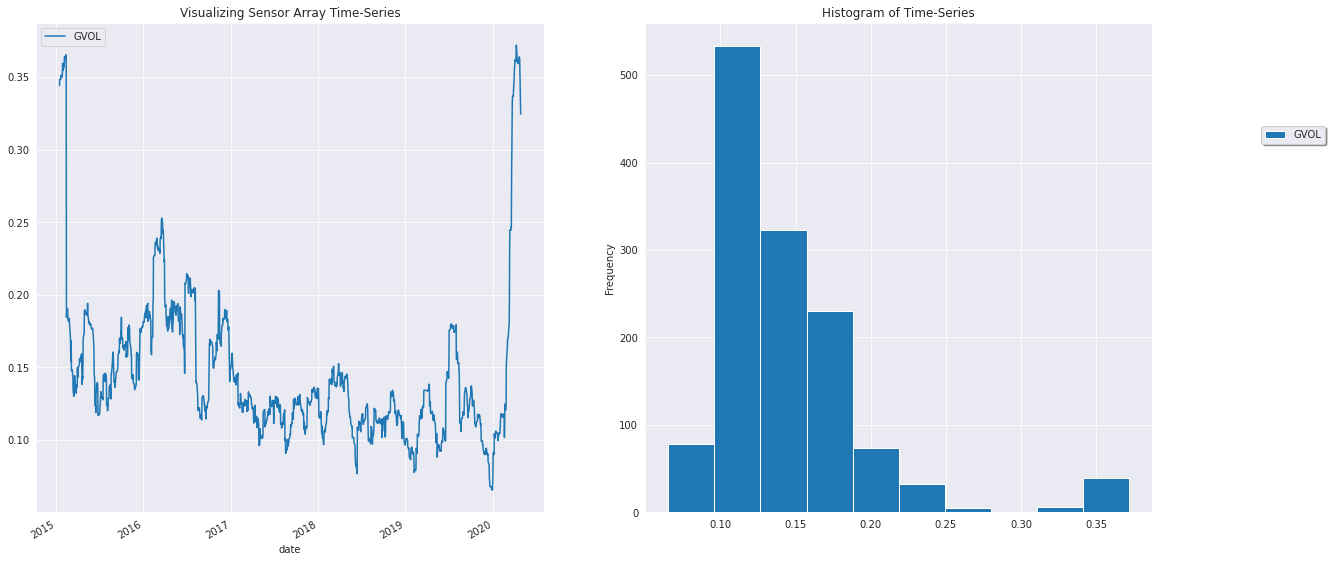

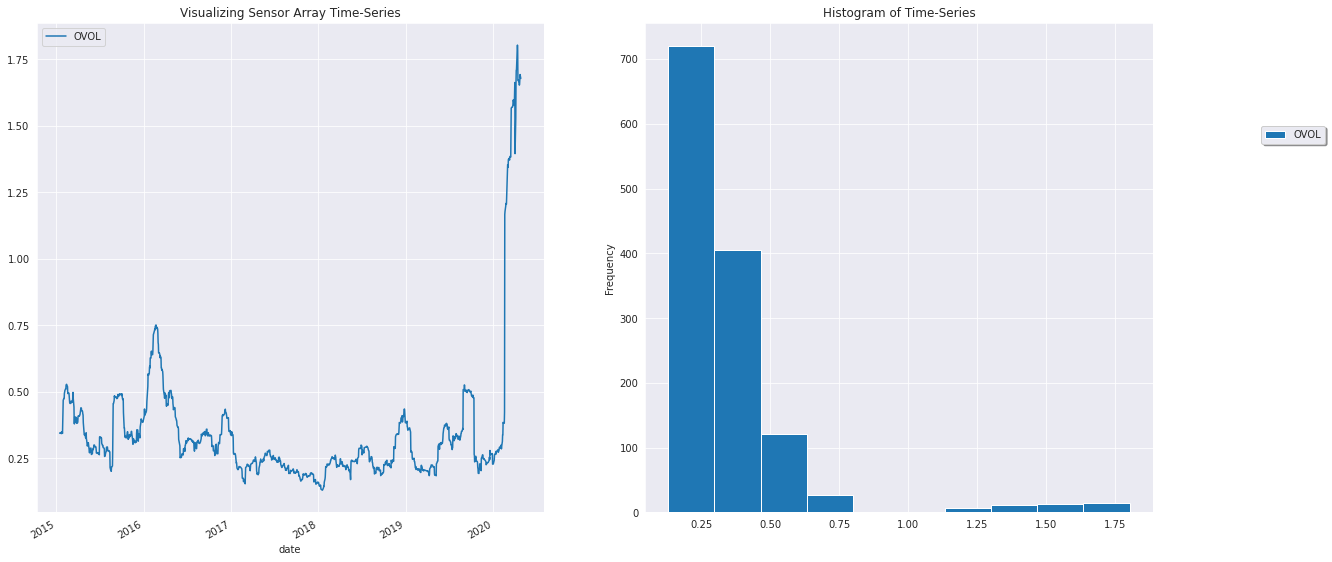

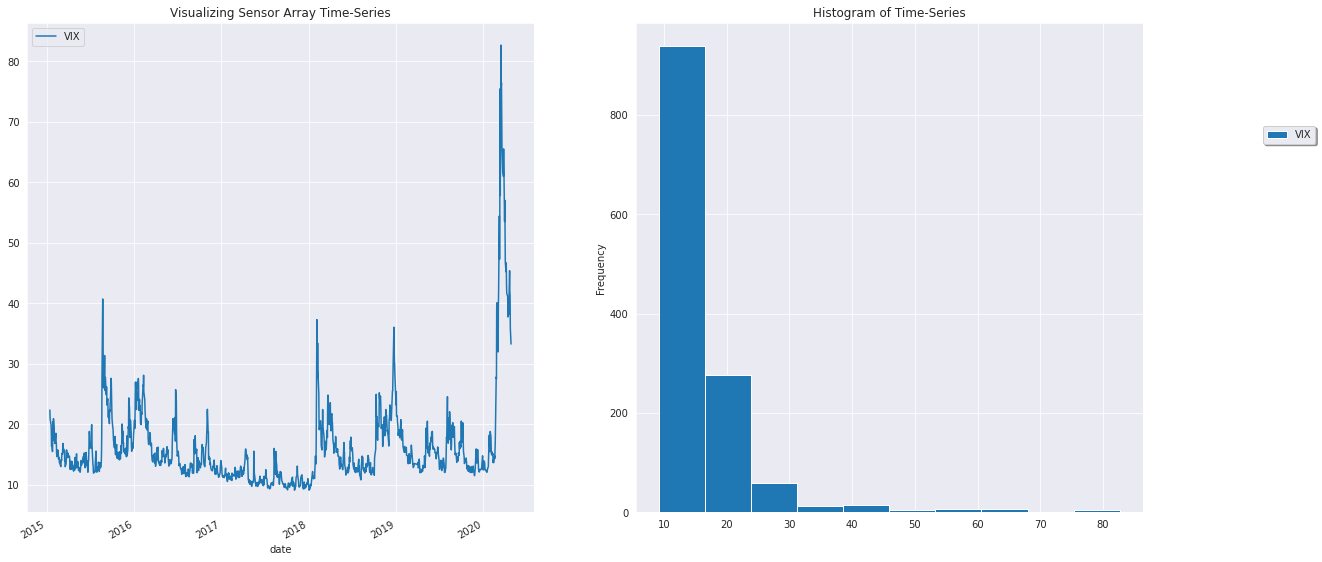

In [14]:
for i in viz:
  ds = df[[i]]
  # Visualize the trends in data
  sns.set_style('darkgrid')
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10))
  ds.plot(kind = 'line', legend = 'reverse', title = 'Visualizing Sensor Array Time-Series', ax =ax[0])
  ds.plot(kind = 'hist', legend = 'reverse', title = 'Histogram of Time-Series', ax =ax[1])
  plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))
  plt.show()
  

# Lag Plot
**Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.**

No handles with labels found to put in legend.


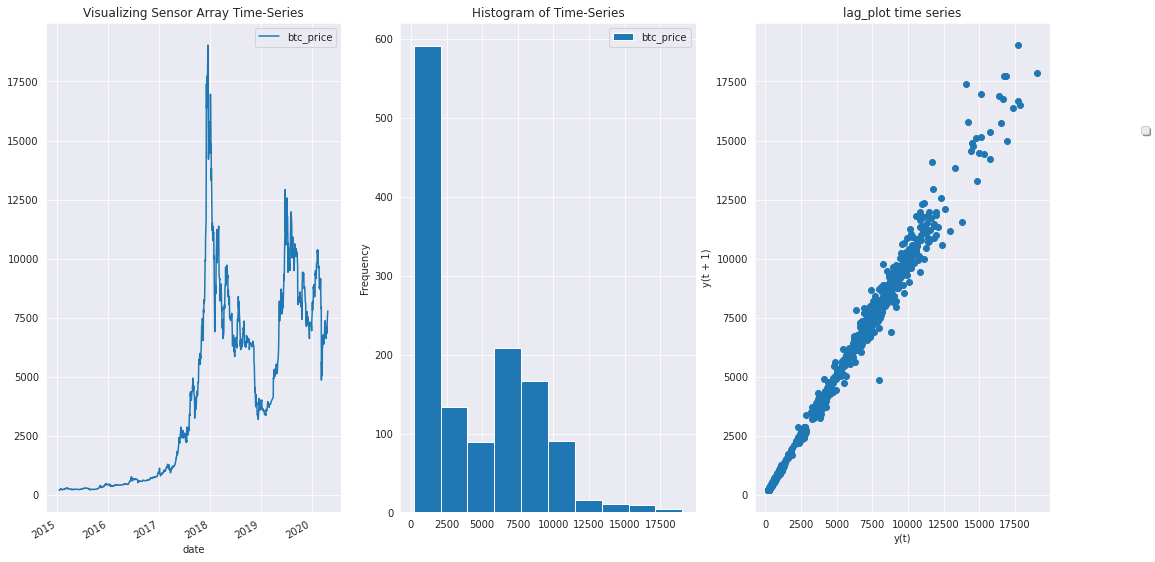

No handles with labels found to put in legend.


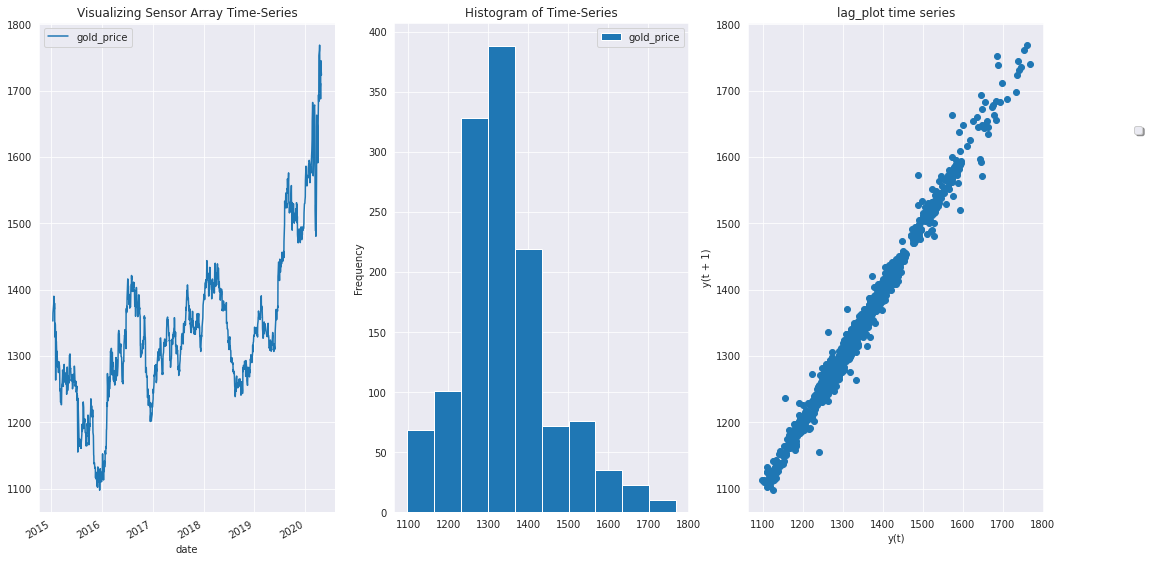

No handles with labels found to put in legend.


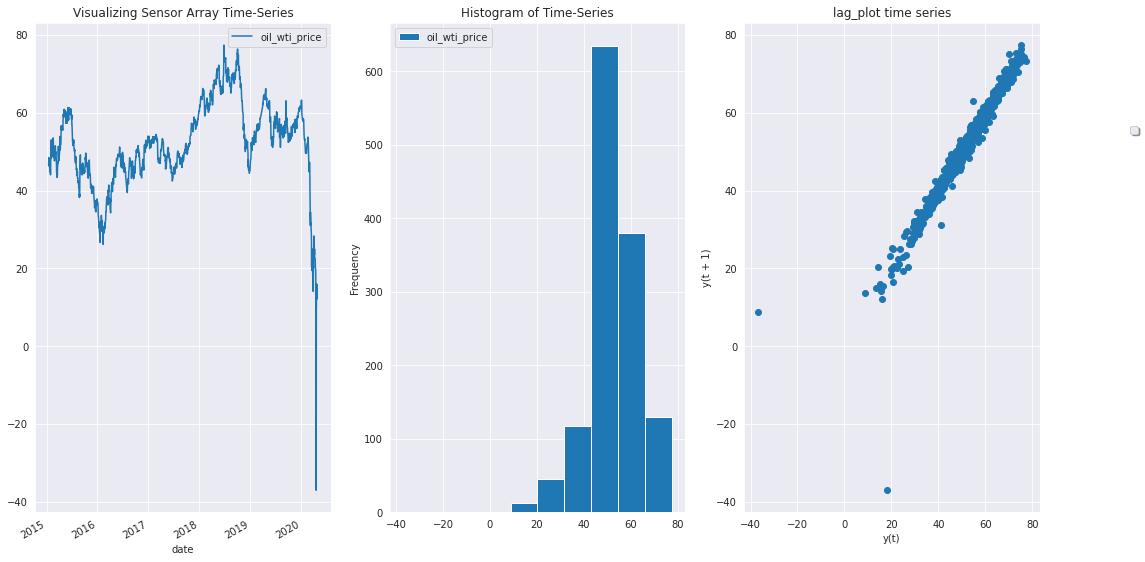

No handles with labels found to put in legend.


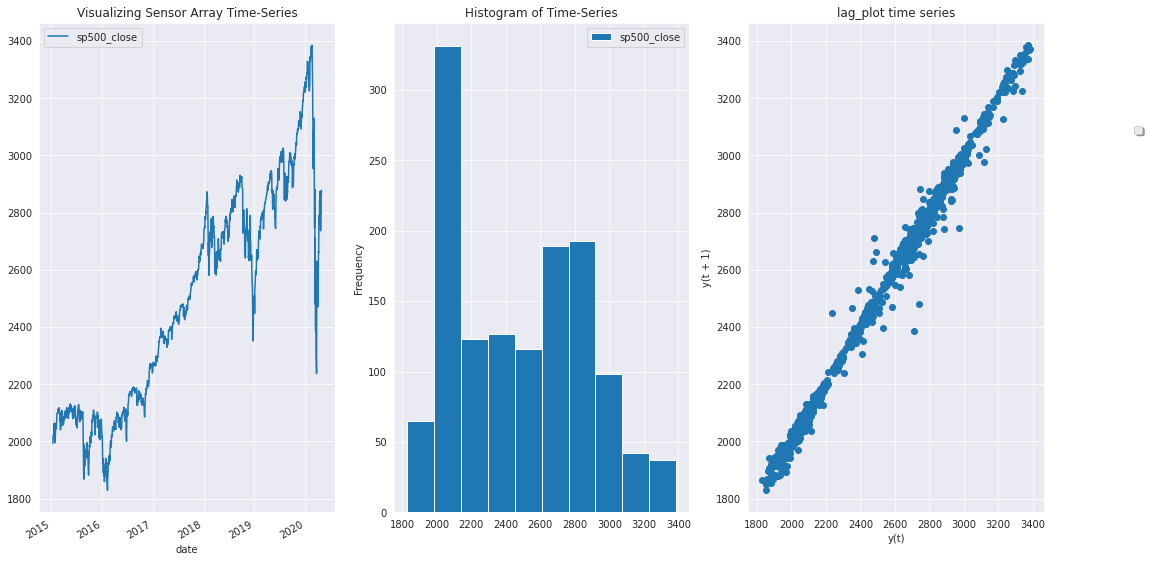

No handles with labels found to put in legend.


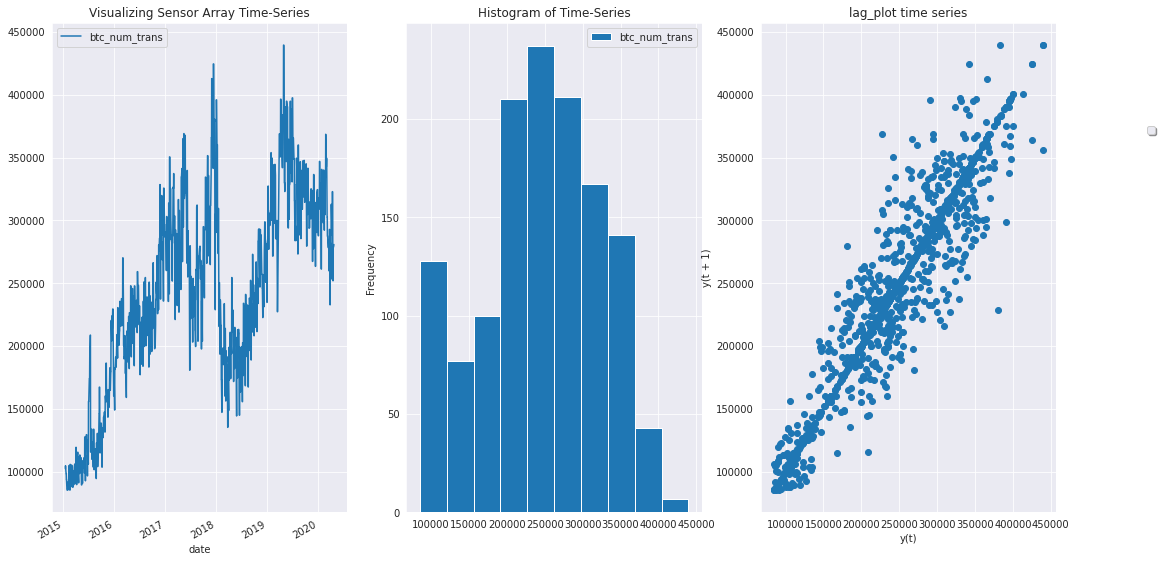

No handles with labels found to put in legend.


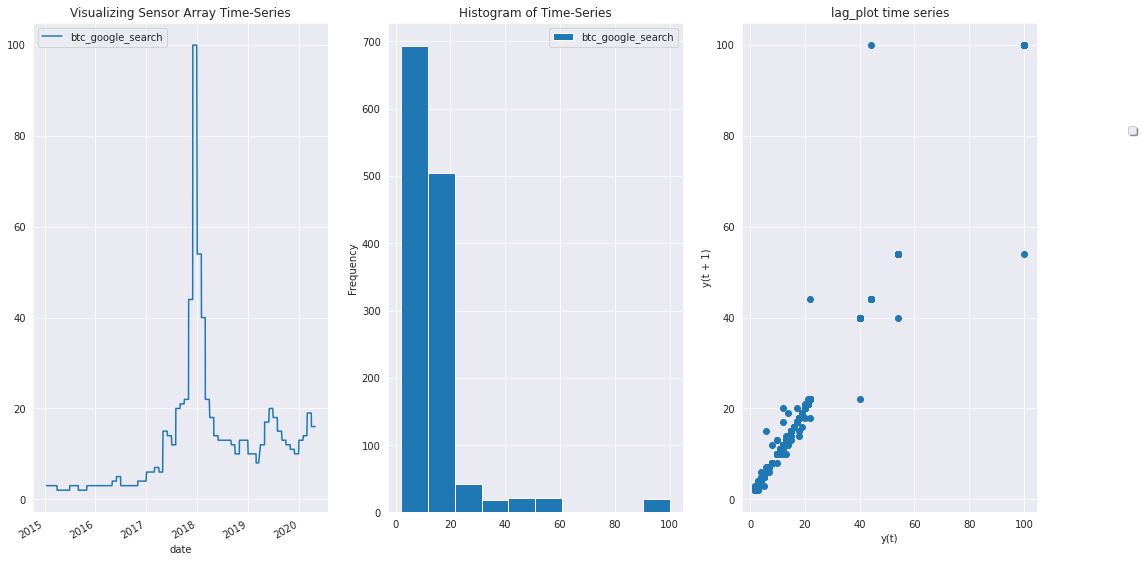

No handles with labels found to put in legend.


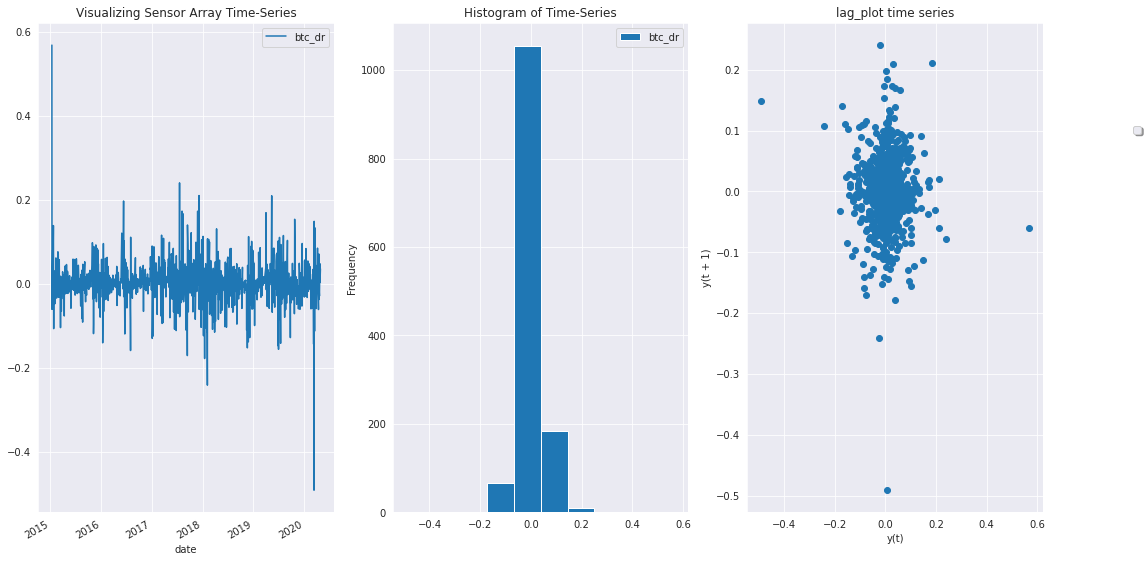

No handles with labels found to put in legend.


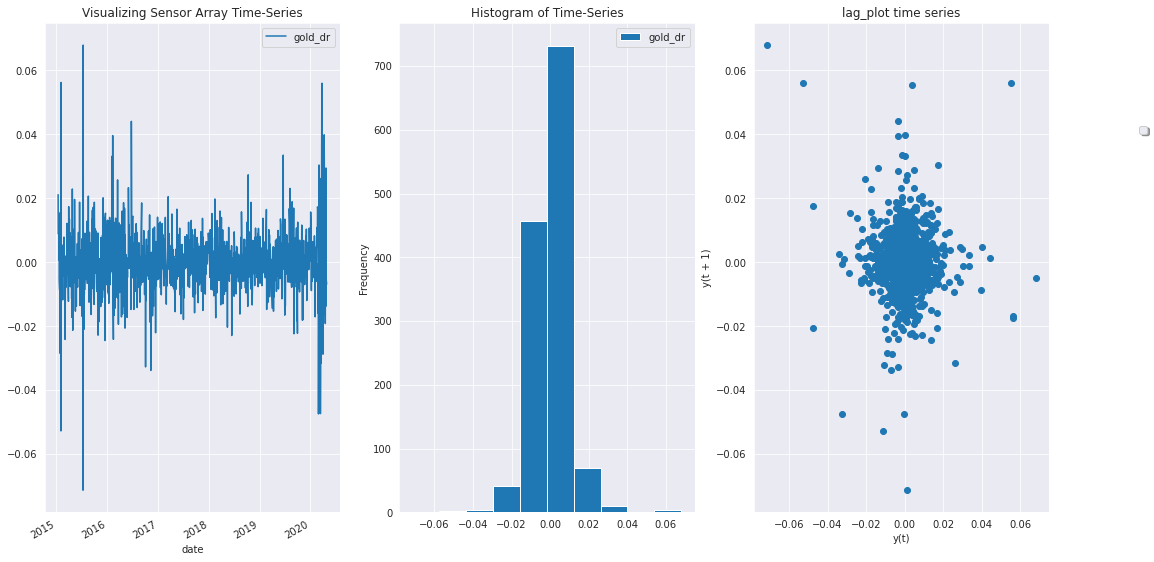

No handles with labels found to put in legend.


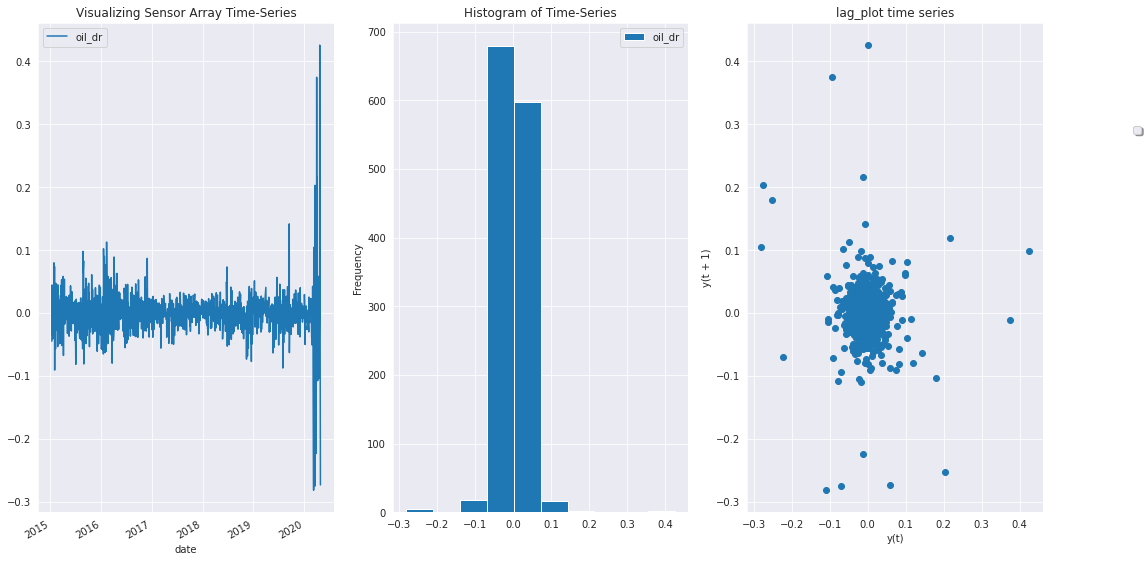

No handles with labels found to put in legend.


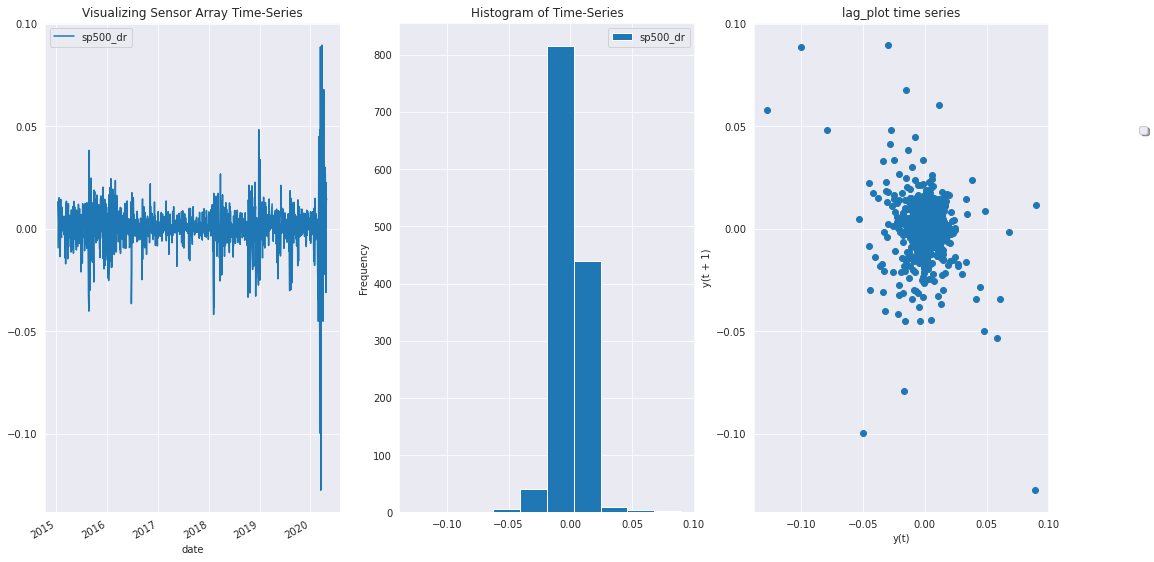

No handles with labels found to put in legend.


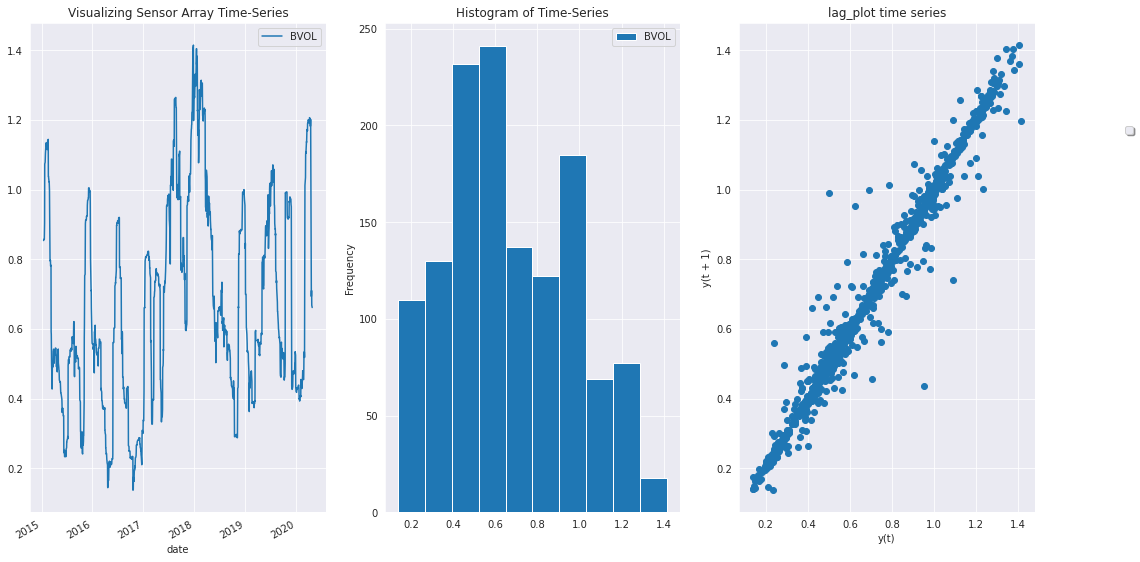

No handles with labels found to put in legend.


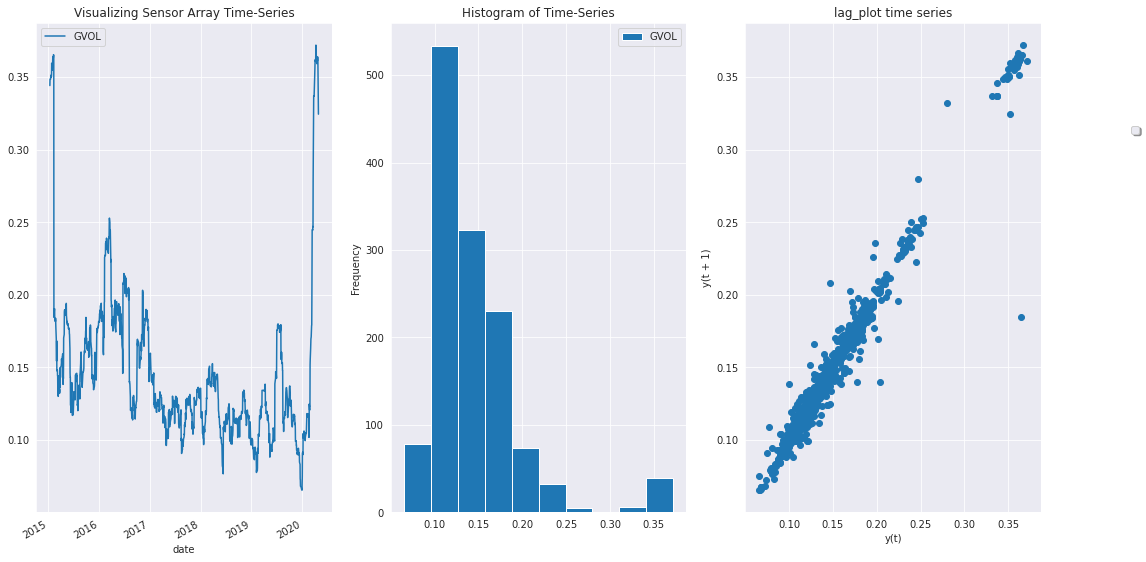

No handles with labels found to put in legend.


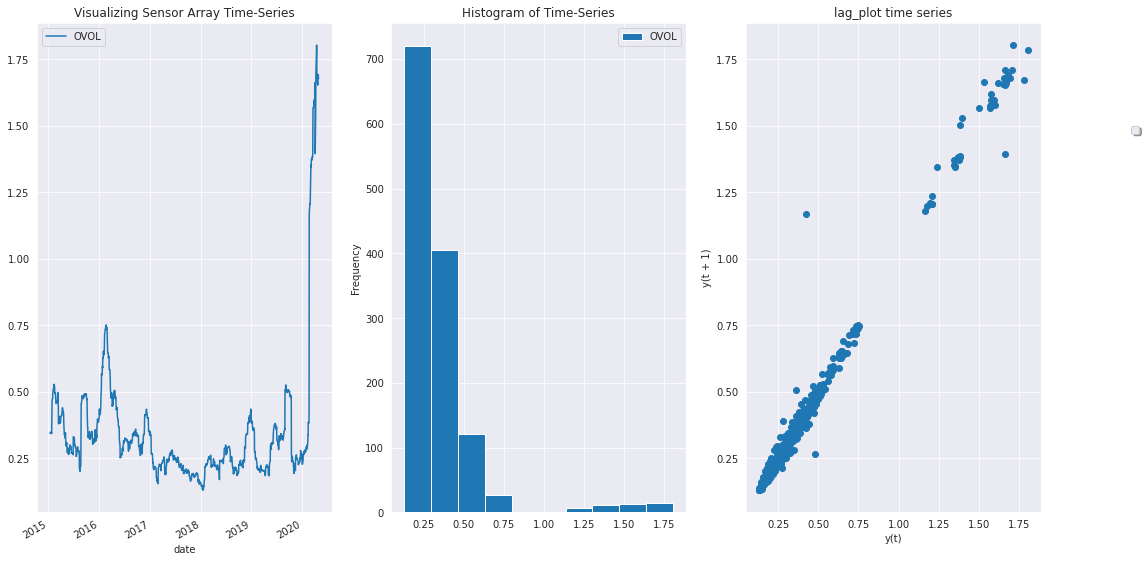

No handles with labels found to put in legend.


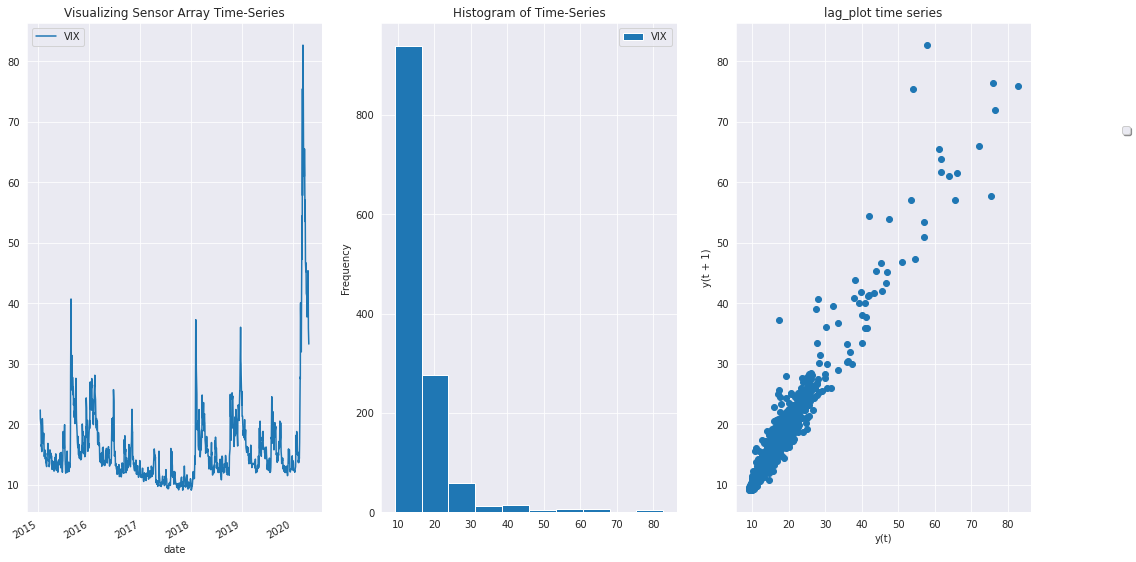

In [15]:
from pandas.plotting import lag_plot


for i in viz:
  ds = df[[i]]
  # Visualize the trends in data
  sns.set_style('darkgrid')
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,10))
  ds.plot(kind = 'line', legend = 'reverse', title = 'Visualizing Sensor Array Time-Series', ax =ax[0])
  ds.plot(kind = 'hist', legend = 'reverse', title = 'Histogram of Time-Series', ax =ax[1])
  lag_plot(ds, ax = ax[2])
  ax[2].set_title('lag_plot time series');
  plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor = (1.35, 0.8))
  plt.show()
  

# Statistical correlation summarizes the strength of the relationship between two variables.

* A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

* A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

['btc_price']


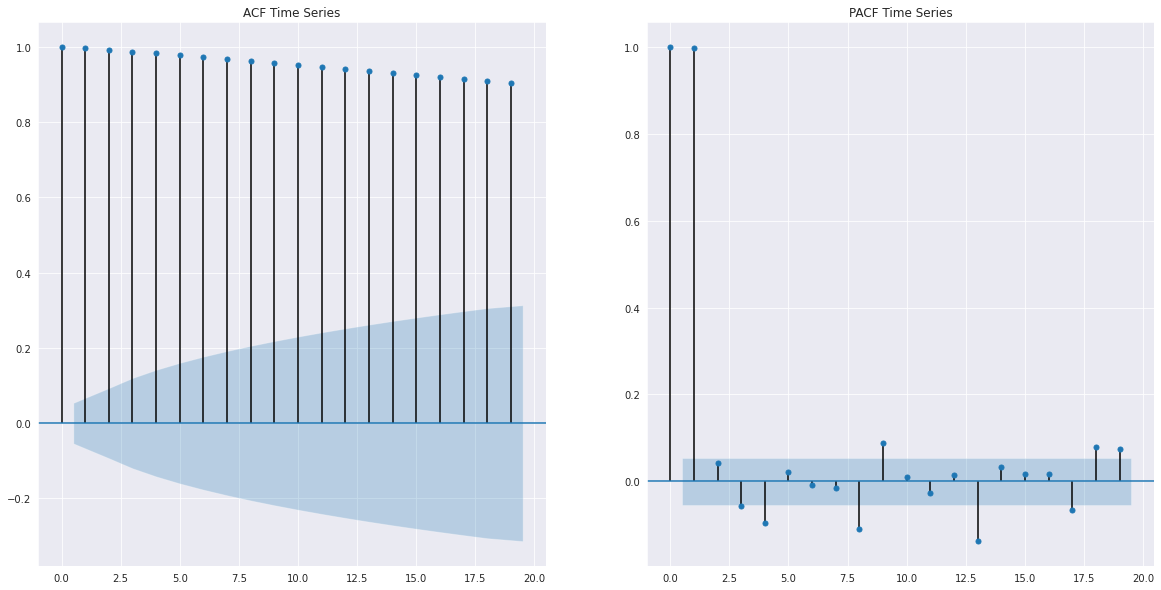

['gold_price']


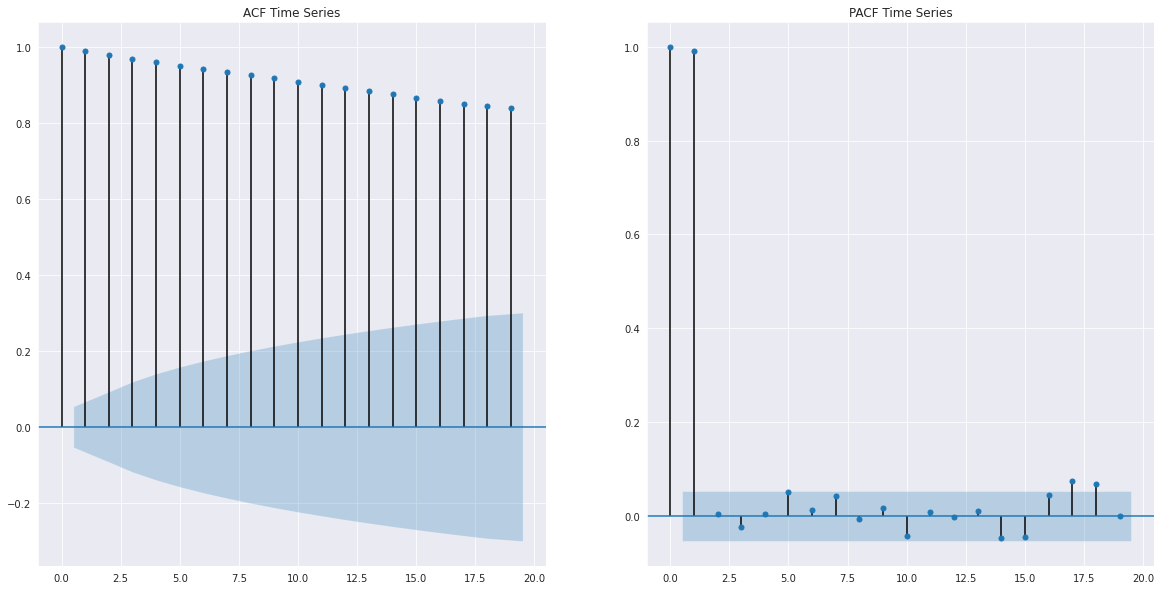

['oil_wti_price']


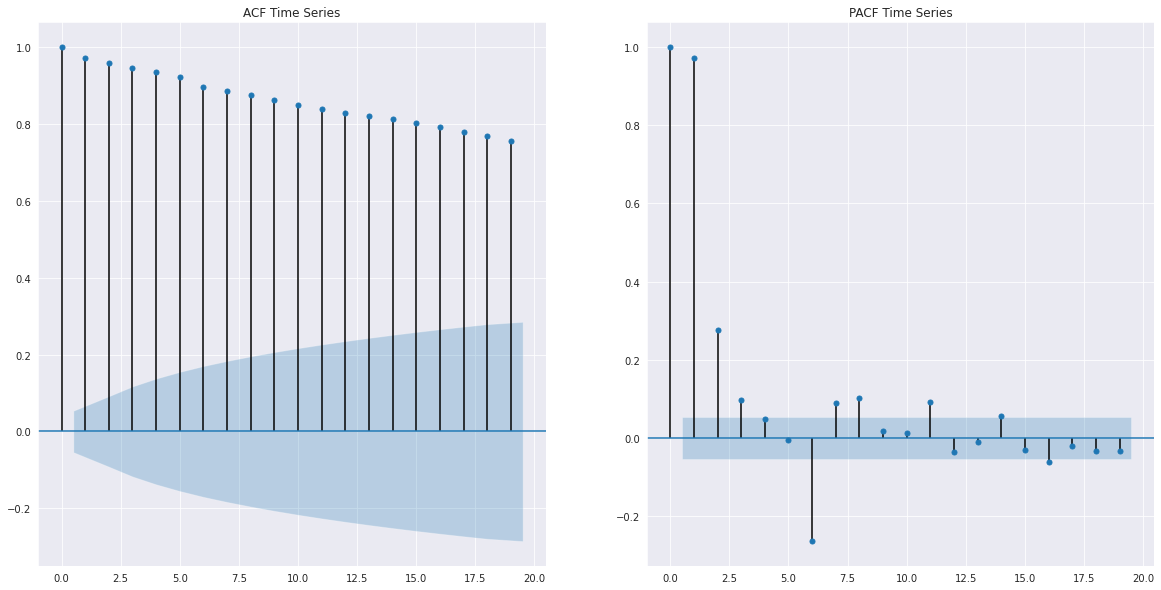

['sp500_close']


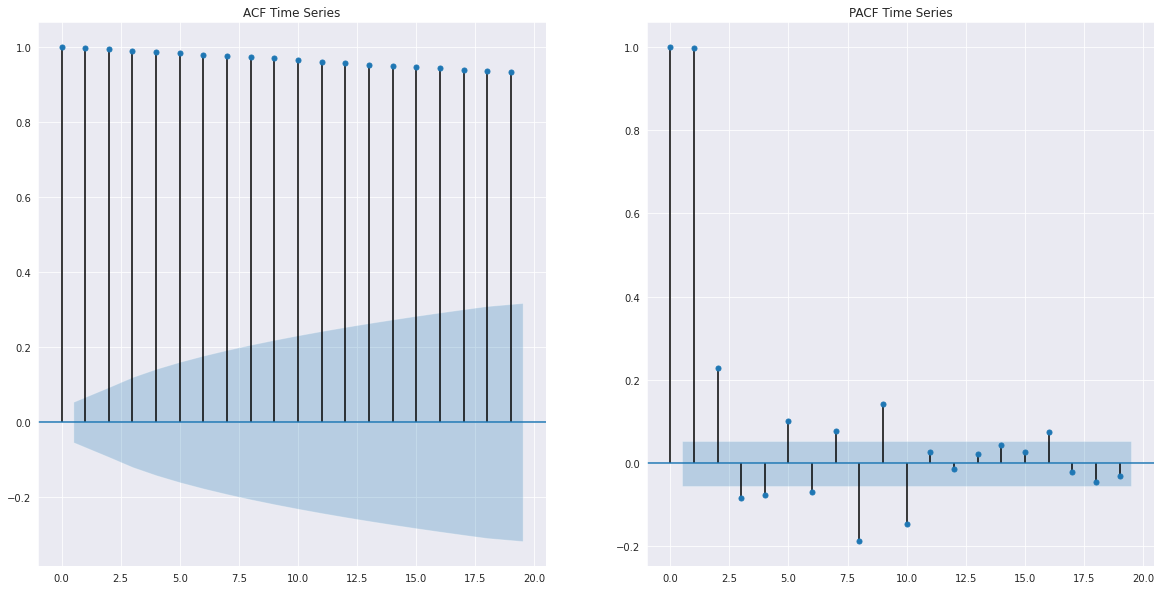

['btc_num_trans']


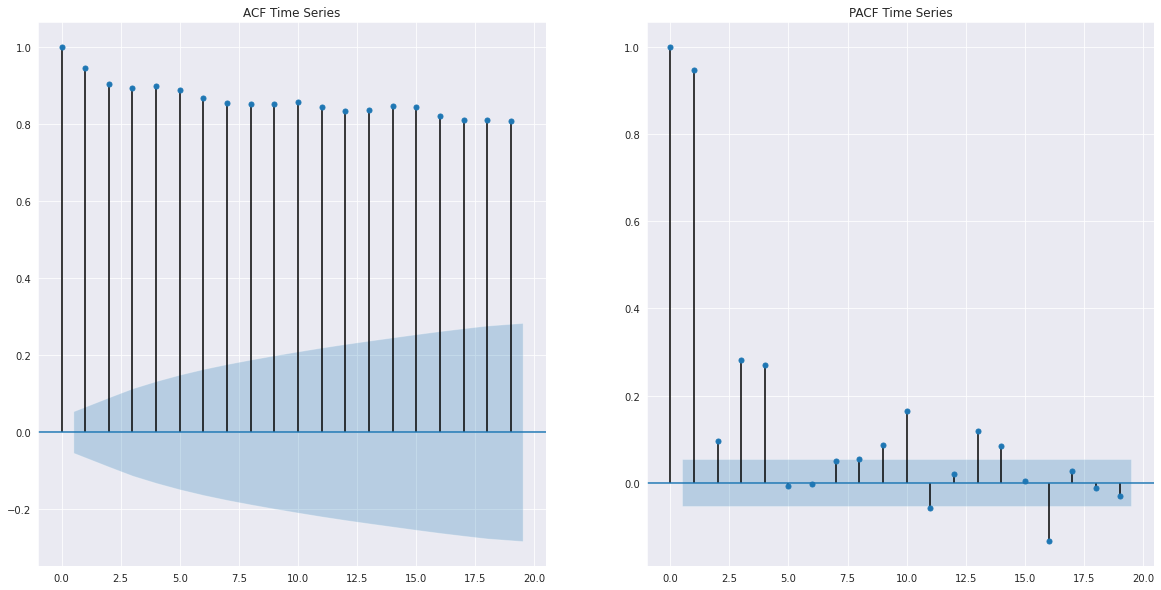

['btc_google_search']


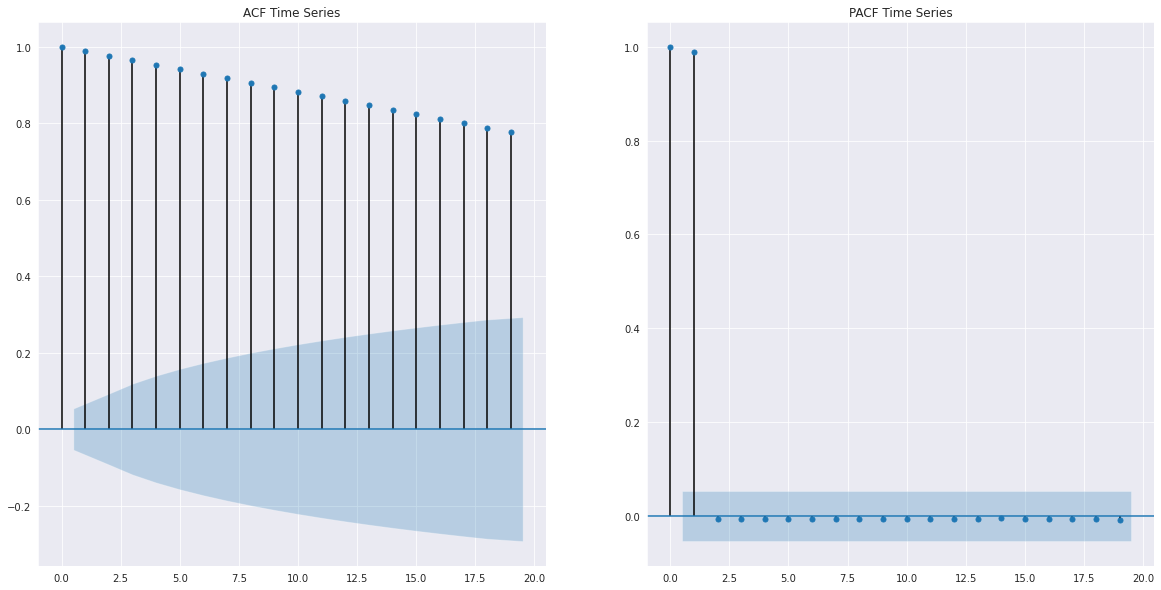

['btc_dr']


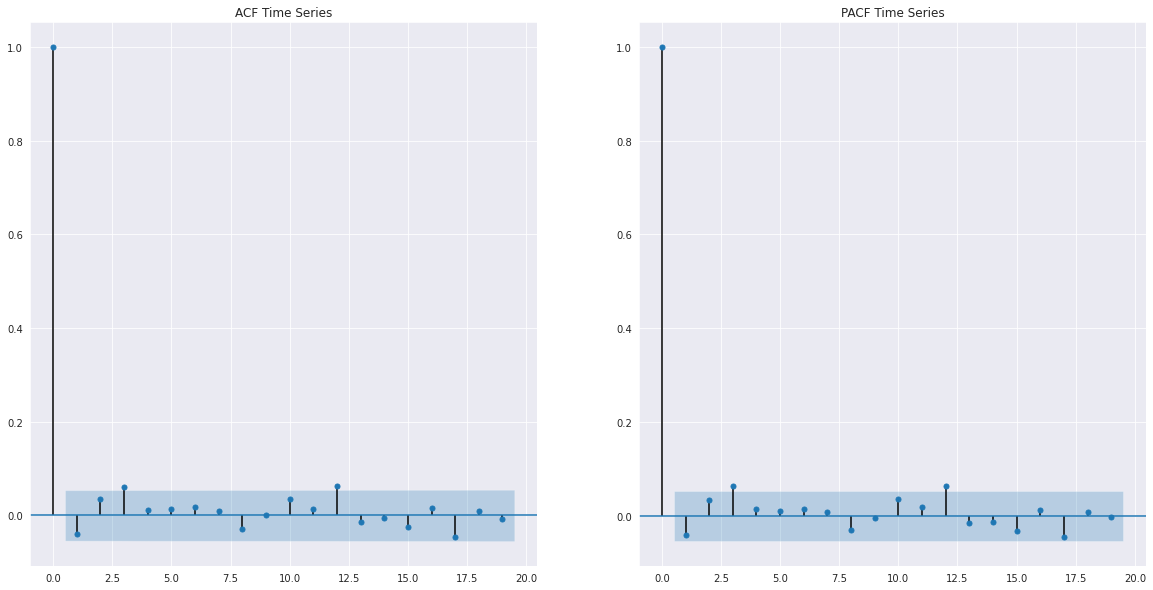

['gold_dr']


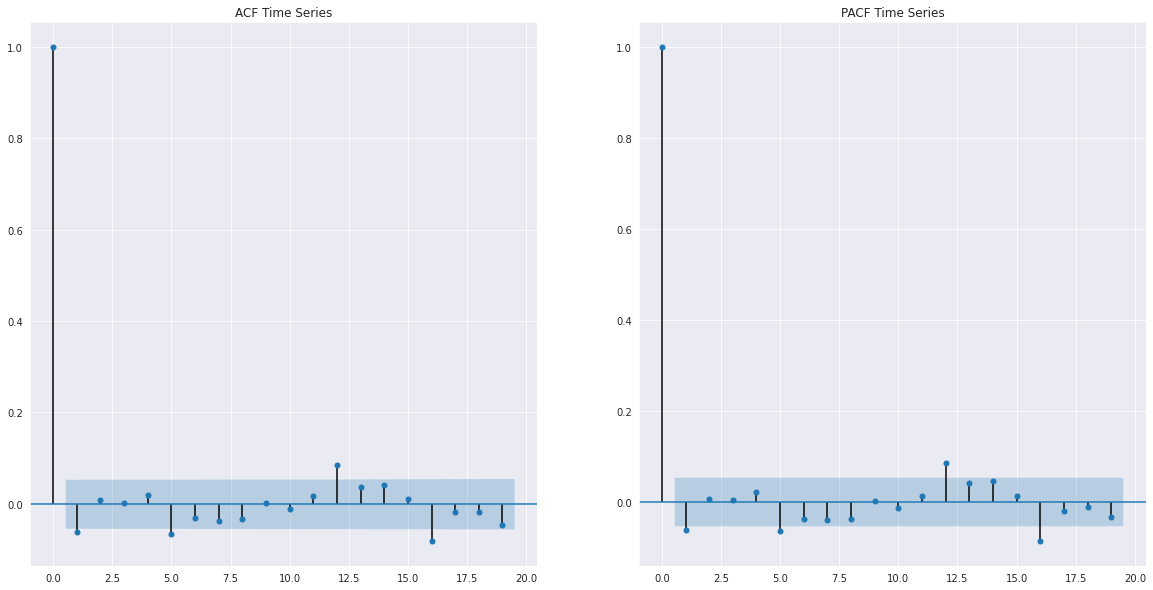

['oil_dr']


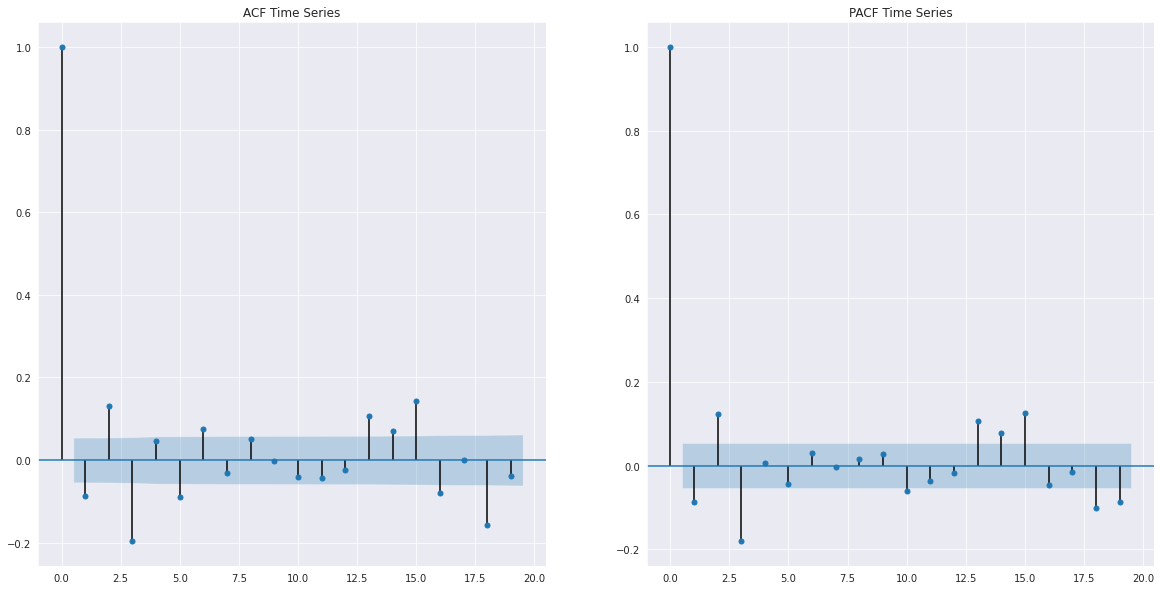

['sp500_dr']


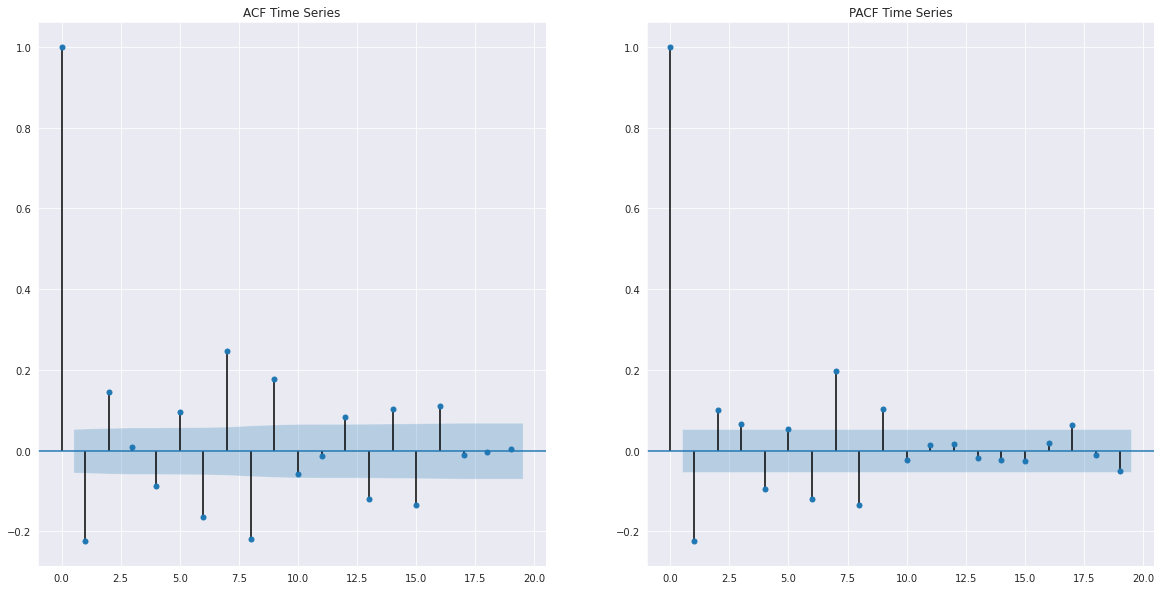

['BVOL']


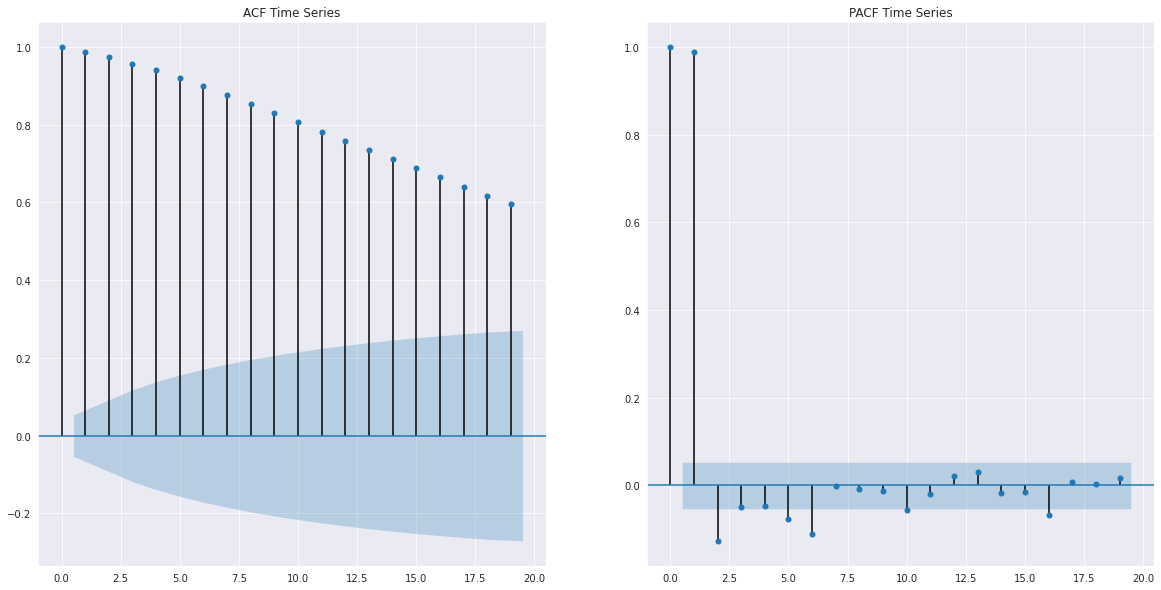

['GVOL']


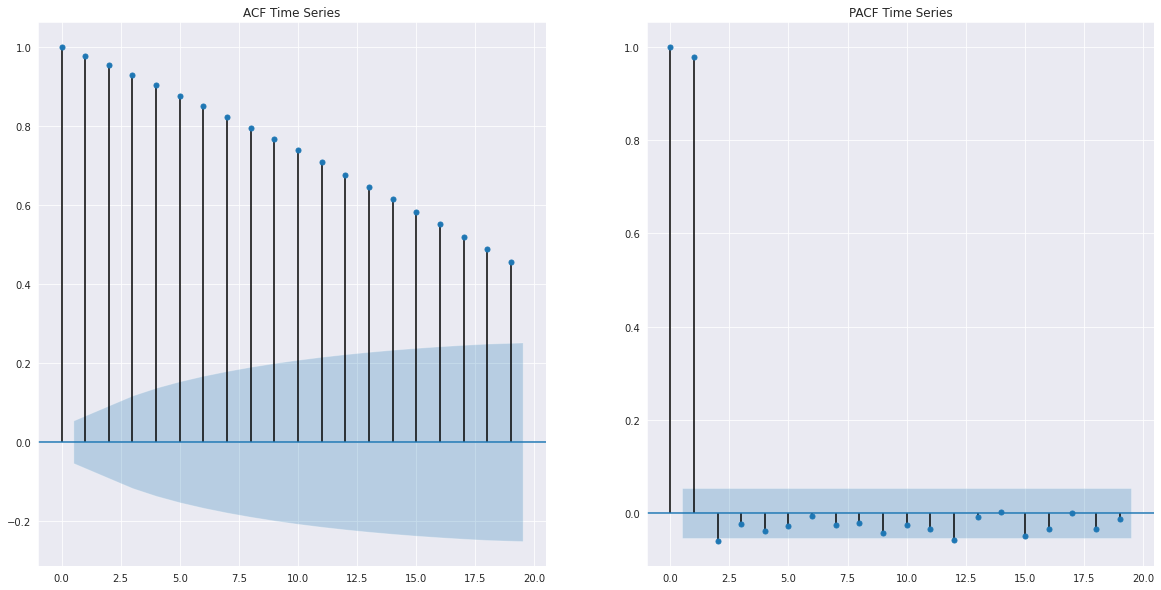

['OVOL']


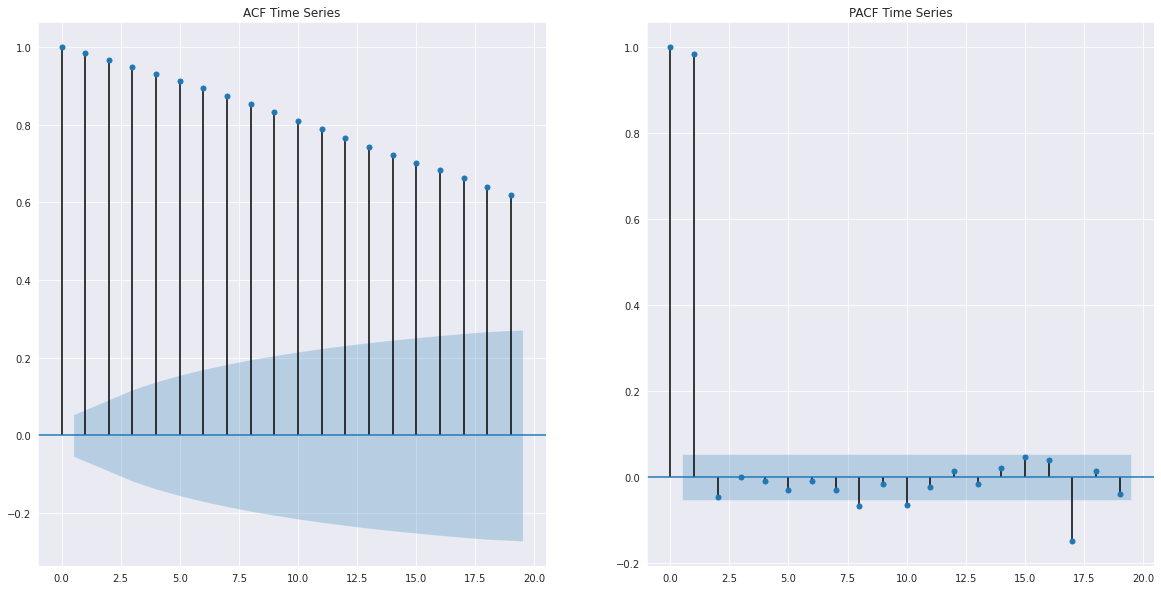

['VIX']


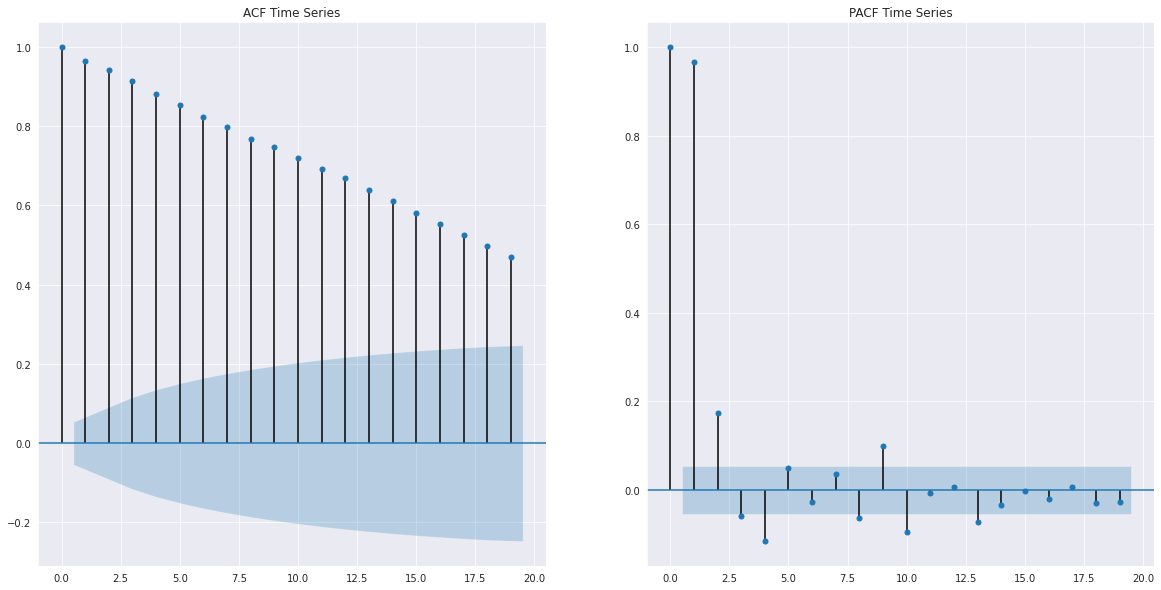

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for i in viz:
  ds = df[[i]]
  # Visualize the trends in data
  sns.set_style('darkgrid')
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20,10))
  print(ds.columns.to_list())
  plot_acf(ds, ax=ax[0], lags = range(0,20))
  ax[0].set_title('ACF Time Series')
  plot_pacf(ds, ax=ax[1], lags = range(0,20))
  ax[1].set_title('PACF Time Series')
  plt.show()

# Statistical Test to Check If Variable is Time Dependent or not

*  p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
*  p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.




In [17]:
feature_range = (0, 1)
#scaler = MinMaxScaler(feature_range)
scaler = StandardScaler(with_mean=False, with_std=False)
scaled_data1 = scaler.fit_transform(df)

In [18]:
scaled_data1.T[1]

array([1352.8, 1364.9, 1377.4, ..., 1745.4, 1735.6, 1723.8])

In [19]:
from statsmodels.tsa.stattools import adfuller
for i,j in enumerate(viz):
  ds = df[[j]]
  X = scaled_data1.T[i].flatten()
  print(X)
  result = adfuller(X)
  print(f'Column name in dataset = {ds.columns}')
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



[ 211.91  199.46  208.   ... 7488.83 7514.64 7789.77]
Column name in dataset = Index(['btc_price'], dtype='object')
ADF Statistic: -1.737825
p-value: 0.411737
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
[1352.8 1364.9 1377.4 ... 1745.4 1735.6 1723.8]
Column name in dataset = Index(['gold_price'], dtype='object')
ADF Statistic: 0.274272
p-value: 0.976133
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
[46.37 48.49 46.79 ... 15.06 15.99 12.17]
Column name in dataset = Index(['oil_wti_price'], dtype='object')
ADF Statistic: -1.272471
p-value: 0.641671
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
[1992.67 2019.42 2022.55 ... 2797.8  2836.74 2878.48]
Column name in dataset = Index(['sp500_close'], dtype='object')
ADF Statistic: -1.539292
p-value: 0.513992
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
[102309. 104699.  98485. ... 278755. 278755. 280805.]
Column name in dataset = Index(['btc_num_trans'], dtype='object')
ADF Statistic: -2.402426
p-value: 0.1410

In [20]:
# Splitting the dataset into train & test subsets
n_obs = 1000
ds_train, ds_test = df[:-n_obs], df[-n_obs:]

# Augmented Dickey-Fuller Test (ADF Test) to check for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(ds):
    dftest = adfuller(ds, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','# Lags','# Observations'])

    for key, value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")


for i in ds_train.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_train[i])
    print('\n')

# Differencing all variables to get rid of Stationarity
ds_differenced = ds_train.diff().dropna()

# Running the ADF test once again to test for Stationarity
for i in ds_differenced.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_differenced[i])
    print('\n')

# Now cols: 3, 5, 6, 8 are non-stationary
ds_differenced = ds_differenced.diff().dropna()

# Running the ADF test for the 3rd time to test for Stationarity
for i in ds_differenced.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_differenced[i])
    print('\n')


Column:  btc_price
--------------------------------------
Test Statistic           -0.621636
p-value                   0.866018
# Lags                    0.000000
# Observations          320.000000
Critical Value (1%)      -3.450952
Critical Value (5%)      -2.870615
Critical Value (10%)     -2.571605
dtype: float64

Series is Non-Stationary


Column:  gold_price
--------------------------------------
Test Statistic           -2.179443
p-value                   0.213791
# Lags                    1.000000
# Observations          319.000000
Critical Value (1%)      -3.451017
Critical Value (5%)      -2.870643
Critical Value (10%)     -2.571620
dtype: float64

Series is Non-Stationary


Column:  oil_wti_price
--------------------------------------
Test Statistic           -1.400056
p-value                   0.582249
# Lags                    0.000000
# Observations          320.000000
Critical Value (1%)      -3.450952
Critical Value (5%)      -2.870615
Critical Value (10%)     -2.571605


# Time Invariant Columns(Stationary) - 7 columns
### btc_dr, gold_dr, oil_dr, sp500_dr, BVOL, GVOL, VIX

------------------------------------------------------------------------

# Time Dependent Columns(non- stationary) - 7 columns
### btc_price, gold_price, oil_wti_price, sp500_close, btc_num_trans, btc_google_search, OVOL


#**First order differencing makes all non-stationary columns Stationary** 